<a href="https://colab.research.google.com/github/prempandey101/Affinity_analysis_using_ML/blob/main/Affinity_Analysis_dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Using apriori package
!pip install apyori


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5976 sha256=49f43c165cbf2bcdf053f77fbd4130c49e7c08f26b74f243cab2da74d05f2d8f
  Stored in directory: /root/.cache/pip/wheels/32/2a/54/10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [ ]:
#importing packages
#numpy = arrays ;pandas=data manupulation
import numpy as np
import pandas as pd
from apyori import apriori

In [ ]:
#loading up the data from dataset of market for basket optimization
dt=pd.read_csv('/content/drive/MyDrive/SIN datasets/Market_Basket_Optimisation.csv',header=None)   #add .header=None to remove the header here

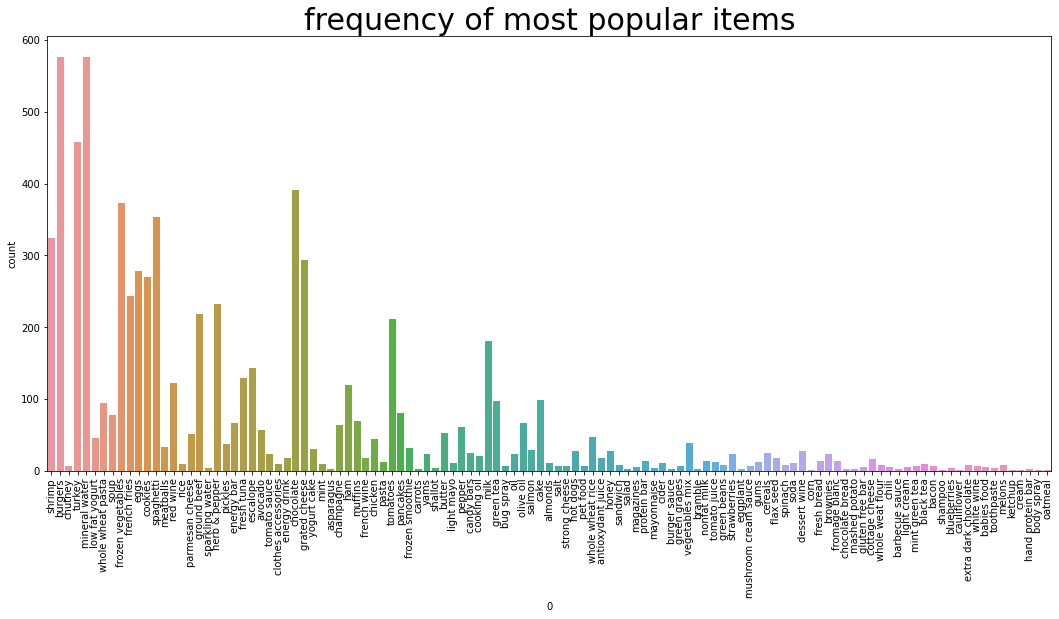

In [ ]:
# looking at the frequency of most popular items 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (18, 8)
sns.countplot(x=dt[0])
plt.title('frequency of most popular items', fontsize = 30)
plt.xticks(rotation = 90 )
plt.show()

In [ ]:
data=dt

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(data.shape)

(7501, 20)


In [ ]:
#We need to replace the empty fields with 0
data.fillna(0,inplace=True)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#since the algorithm uses a list format, we need to convert the data in list format.
transactions=[]
for i in range(0,len(data)):
  transactions.append([str(data.values[i,j]) for j in range(0,20) if str(data.values[i,j])!='0'])

In [ ]:
print(type(transactions))

<class 'list'>


In [ ]:
#Now, we will implemement apriori algorithm
#using the confidence, lift and support properties of association rules with apriori
#We will set the value of min_support=0.003, min_confidence=0.2,min_lift=3,min_length=2
#transactions: A list of transactions.
# min_support= To set the minimum support float value. Here we have used 0.003 that is calculated by taking 3 transactions per customer each week to the total number of transactions.
# min_confidence: To set the minimum confidence value. Here we have taken 0.2. It can be changed as per the business problem.
# min_lift= To set the minimum lift value.
# min_length= It takes the minimum number of products for the association.
# max_length = It takes the maximum number of products for the association.

association_rules = apriori(transactions, min_support=0.003,min_confidence=0.2,min_lift=3,min_length=2)
association_results = list(association_rules)   #listing the items with rules being converted to list

In [ ]:
#uncomment it
association_results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [ ]:
#finally forming a dataframe
df_result=pd.DataFrame(association_results)

In [ ]:
df_result

,items,support,ordered_statistics
0,"(chicken, light cream)",0.004533,"[((light cream), (chicken), 0.2905982905982905..."
1,"(mushroom cream sauce, escalope)",0.005733,"[((mushroom cream sauce), (escalope), 0.300699..."
2,"(pasta, escalope)",0.005866,"[((pasta), (escalope), 0.3728813559322034, 4.7..."
3,"(honey, fromage blanc)",0.003333,"[((fromage blanc), (honey), 0.2450980392156863..."
4,"(herb & pepper, ground beef)",0.015998,"[((herb & pepper), (ground beef), 0.3234501347..."
...,...,...,...
75,"(olive oil, spaghetti, ground beef, mineral wa...",0.003066,"[((olive oil, ground beef), (spaghetti, minera..."
76,"(spaghetti, ground beef, pancakes, mineral water)",0.003066,"[((ground beef, pancakes), (spaghetti, mineral..."
77,"(spaghetti, ground beef, tomatoes, mineral water)",0.003066,"[((ground beef, tomatoes), (spaghetti, mineral..."
78,"(olive oil, spaghetti, milk, mineral water)",0.003333,"[((spaghetti, milk, mineral water), (olive oil..."


In [ ]:
print("There are {} Relation derived.".format(len(association_results)))

There are 80 Relation derived.


In [ ]:
#association rules defined
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'chicken', 'light cream'})
frozenset({'mushroom cream sauce', 'escalope'})
frozenset({'pasta', 'escalope'})
frozenset({'honey', 'fromage blanc'})
frozenset({'herb & pepper', 'ground beef'})
frozenset({'ground beef', 'tomato sauce'})
frozenset({'olive oil', 'light cream'})
frozenset({'olive oil', 'whole wheat pasta'})
frozenset({'shrimp', 'pasta'})
frozenset({'spaghetti', 'avocado', 'milk'})
frozenset({'burgers', 'milk', 'cake'})
frozenset({'burgers', 'chocolate', 'turkey'})
frozenset({'burgers', 'milk', 'turkey'})
frozenset({'frozen vegetables', 'cake', 'tomatoes'})
frozenset({'spaghetti', 'ground beef', 'cereals'})
frozenset({'milk', 'chicken', 'ground beef'})
frozenset({'olive oil', 'chicken', 'milk'})
frozenset({'olive oil', 'chicken', 'spaghetti'})
frozenset({'frozen vegetables', 'chocolate', 'shrimp'})
frozenset({'ground beef', 'herb & pepper', 'chocolate'})
frozenset({'milk', 'chocolate', 'soup'})
frozenset({'ground beef', 'spaghetti', 'cooking oil'})
frozenset({'herb 

In [ ]:
#The below code shows how the data are associated in a more detailed way...
association_results

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'pasta', 'escalope'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'honey', 'fromage blanc'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [ ]:
for item in association_results:
    # first index of the inner list
    # Contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    # second index of the inner list
    print("Support: " + str(item[1]))

    # third index of the list located at 0th
    # of the third index of the inner list

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: light cream -> chicken
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: mushroom cream sauce -> escalope
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: pasta -> escalope
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: honey -> fromage blanc
Support: 0.003332888948140248
Confidence: 0.2450980392156863
Lift: 5.164270764485569
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: ground beef -> tomato sauce
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: olive oil -> light cream
Support: 0.003199573390214638
Confidence: 0.20512820512820515
Lift: 3.1147098515519573
Rule: whole wheat pasta -> olive oil
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: pasta -> shrimp
Support: 0.005065991201173177
Confide

In [ ]:
#analysis can be done from the code below which shows each parameter of apriori algorithm-->>>

In [ ]:

# putting output into a pandas dataframe
def inspect(association_results):
    lhs         = [tuple(result[2][0][0])[0] for result in association_results]
    rhs         = [tuple(result[2][0][1])[0] for result in association_results]
    support    = [result[1] for result in association_results]
    confidence = [result[2][0][2] for result in association_results]
    lift       = [result[2][0][3] for result in association_results]
    return list(zip(lhs, rhs, support, confidence, lift))
output_DataFrame = pd.DataFrame(inspect(association_results), columns = ['Left_Hand_Side', 'Right_Hand_Side', 'Support', 'Confidence', 'Lift'])

In [ ]:
output_DataFrame

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
0,light cream,chicken,0.004533,0.290598,4.843951
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
2,pasta,escalope,0.005866,0.372881,4.700812
3,fromage blanc,honey,0.003333,0.245098,5.164271
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
...,...,...,...,...,...
75,olive oil,mineral water,0.003066,0.216981,3.632981
76,pancakes,mineral water,0.003066,0.211009,3.532991
77,ground beef,mineral water,0.003066,0.261364,4.376091
78,mineral water,olive oil,0.003333,0.211864,3.216994


In [ ]:
output_DataFrame.nlargest(n = 10, columns = 'Lift') #lift shows the actual value we are looking for

,Left_Hand_Side,Right_Hand_Side,Support,Confidence,Lift
70,soup,mineral water,0.003066,0.383333,7.987176
69,olive oil,mineral water,0.003333,0.294118,6.128268
52,whole wheat pasta,olive oil,0.003866,0.402778,6.115863
44,tomato sauce,ground beef,0.003066,0.216981,5.535971
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
24,ground beef,herb & pepper,0.003200,0.230769,4.665768
61,mineral water,shrimp,0.003200,0.328767,4.600900
66,frozen vegetables,mineral water,0.003733,0.220472,4.593788


In [ ]:
# #Results
# For soup and mineral water-->> Support=0.003066. It shows popularity

# confidence =0.38333. It means out of all the transaction of soup,38.33 percent 
# people tend to buy mineral water too

# Lift=7.987. It means the mineral water is 7.89 times more likely to be bought 
# by the customer 
